In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
houses = pd.read_csv('Casas_venezuela.csv')
apartments = pd.read_csv('Departamentos_venezuela.csv')

In [117]:
def graph_categorical_relations(df, features):
    for col in features:
        fig = plt.figure(figsize=(9,6))
        ax = fig.gca()

        if df[col].dtype == "object":
            grouped = df.groupby(col)
            df2 = pd.DataFrame({col:vals['Precio'] for col,vals in grouped})
            medians = df2.median()
            medians.sort_values(ascending=True, inplace=True)
            df2 = df2[medians.index]
            df2.boxplot(ax=ax)
        else:
            df.boxplot(column = 'Precio', by = col, ax=ax)

        ax.set_ylabel('Precio')
        ax.get_yaxis().set_major_formatter(lambda x, pos: f'{x:.0f}')

        if len(ax.get_xticklabels()) > 10 and any([len(str(label.get_text())) >= 5 for label in ax.get_xticklabels()]):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        elif len(ax.get_xticklabels()) > 5 and any([len(str(label.get_text())) >= 5 for label in ax.get_xticklabels()]):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

        ax.set_title('Precio en función de ' + col)
    plt.show()

In [118]:
from scipy.stats import linregress

In [119]:
def graph_numeric_relations(df, features):
    for col in features:
        fig = plt.figure(figsize=(9,6))
        ax = fig.gca()

        feature = df[col]

        try:
            feature = df[col].astype(int)
            label = df['Precio']
        except pd.errors.IntCastingNaNError:
            feature = df[ df[col].notnull() ][col]
            label = df[ df[col].notnull() ]['Precio']

        corr = feature.corr(label)

        plt.scatter(x=feature, y=label)

        lin_reg = linregress(x=feature, y=label)
        line = [ lin_reg.slope * xi + lin_reg.intercept for xi in feature ]
        ax.plot(feature, line, color='red')

        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, f'Correlación: {corr}\n'+r'$R^{2}$'+f': {lin_reg.rvalue**2:.4f}', transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

        ax.set_xlabel(col)
        ax.set_ylabel('Precio')
        ax.ticklabel_format(style='plain')
        ax.set_title(f'Precio en función de {col}')
    plt.show()

# Casas

In [120]:
mask_price = ((houses['Precio'] <= houses['Precio'].quantile(q=0.95)) & (houses['Precio'] >= houses['Precio'].quantile(q=0.05)))
mask_area = ((houses['Área Privada'] <= houses['Área Privada'].quantile(q=0.95)) & (houses['Área Privada'] >= houses['Área Privada'].quantile(q=0.05)))
mask_terrain = ((houses['Terreno'] <= houses['Terreno'].quantile(q=0.95)) & (houses['Terreno'] >= houses['Terreno'].quantile(q=0.05)))

houses = houses[mask_area & mask_price & mask_terrain]

In [121]:
houses.shape

(276, 20)

In [122]:
houses.head()

,Precio,Codígo RAH,Tipo de Propiedad,Estilo,Área Privada,Terreno,Estado Del Inmueble,Dormitorios,Total Baños,Baños Completos,Tipo De Estacionamiento,Puestos De Estacionamiento,Amoblado,Dormitorio De Servicio,Calle,País,Estado,Ciudad,Urbanización,Medios Baños
0,498000,VE 23-26224,Casa,1 Nivel,948,948,Usado,5,8,8,Cubierto,10.0,Si,Si,Publica,Venezuela,Distrito Metropolitano,Caracas,Lomas del Club Hipico,0.0
1,240000,VE 23-26220,Casa,Multipes Niveles,307,704,Usado,5,6,5,Descubierto,4.0,No,Si,Cerrada con Vigilancia,Venezuela,Distrito Metropolitano,Caracas,El Marques,1.0
2,580000,VE 23-26215,Casa,1 Nivel,380,1251,Usado,5,6,5,Cubierto,5.0,No,Si,Cerrada con Vigilancia,Venezuela,Distrito Metropolitano,Caracas,Prados del Este,1.0
3,380000,VE 23-26209,Casa,Duplex,580,504,Usado,4,5,4,Cubierto,3.0,No,Si,Cerrada con Vigilancia,Venezuela,Distrito Metropolitano,Caracas,Sorocaima,1.0
4,270000,VE 23-26196,Casa,Multipes Niveles,400,617,Usado,4,3,3,Cubierto,5.0,No,Si,Cerrada con Vigilancia,Venezuela,Distrito Metropolitano,Caracas,Lomas del Halcon,0.0


Voy a definir las columnas que en principio parecen interesantes para el modelo.

In [123]:
house_numeric_features = ['Área Privada', 'Terreno']
houses_ordinal_features = ['Dormitorios', 'Total Baños', 'Puestos De Estacionamiento']
houses_categorical_features = ['Estilo', 'Estado Del Inmueble', 'Tipo De Estacionamiento', 'Calle', 'Estado', 'Ciudad']

Ahora voy a graficar su comportamiento con el precio para ver si realmente son utiles o no.

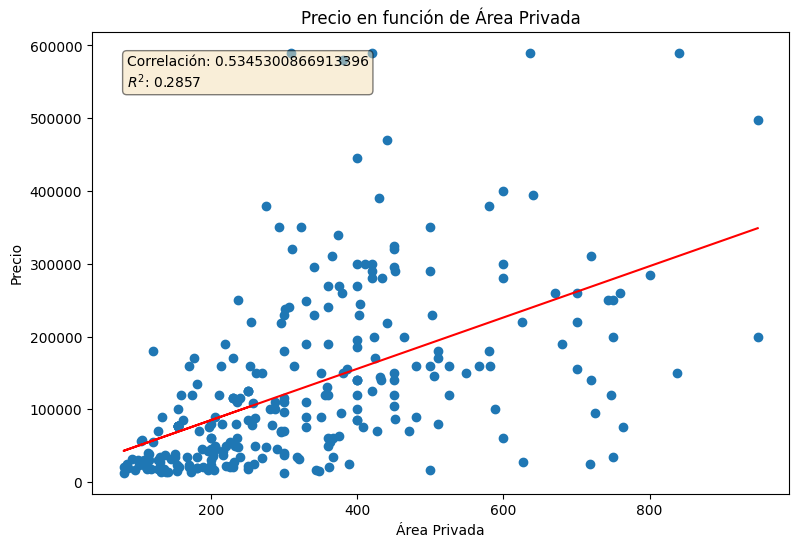

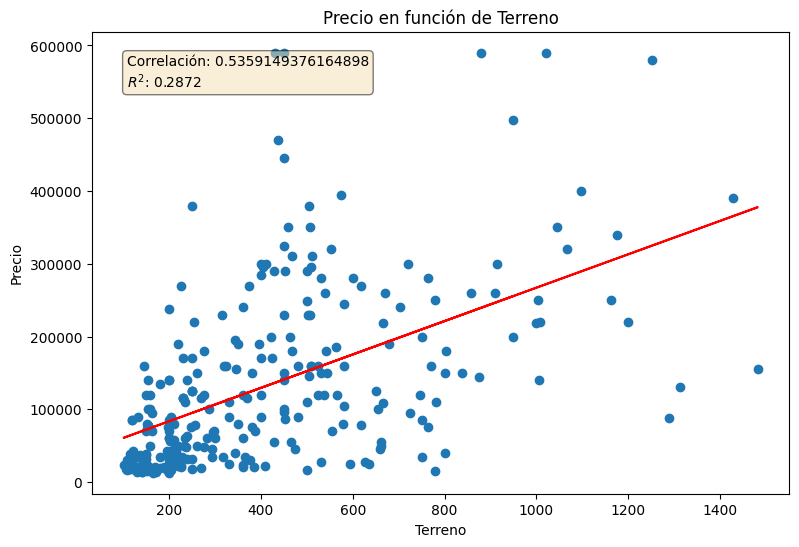

In [124]:
graph_numeric_relations(houses, house_numeric_features)

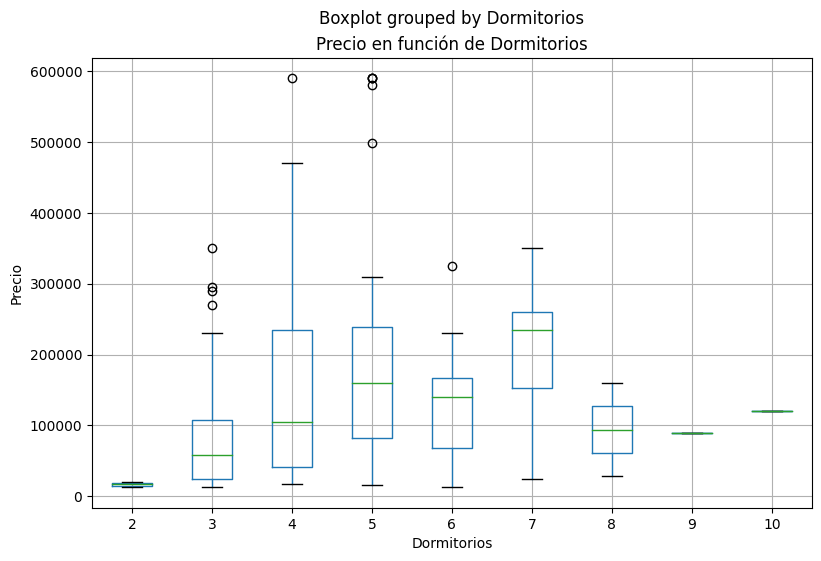

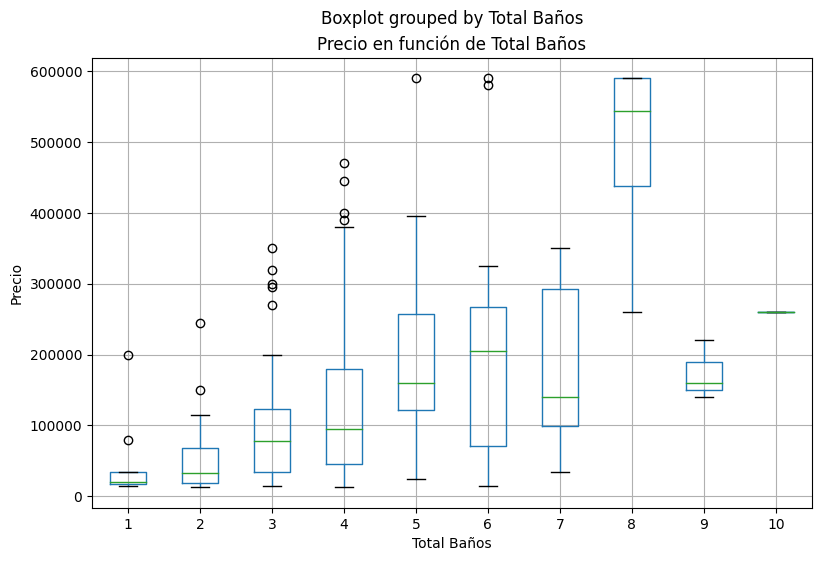

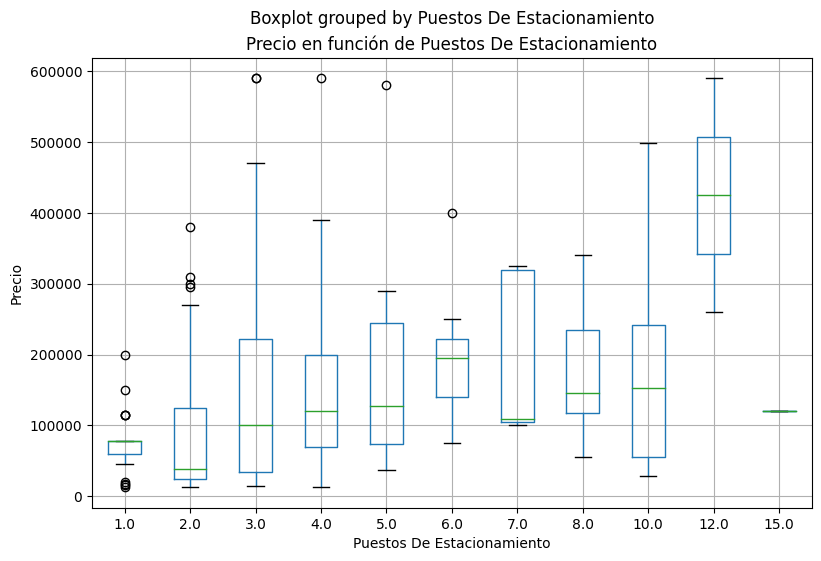

In [125]:
graph_categorical_relations(houses, houses_ordinal_features)

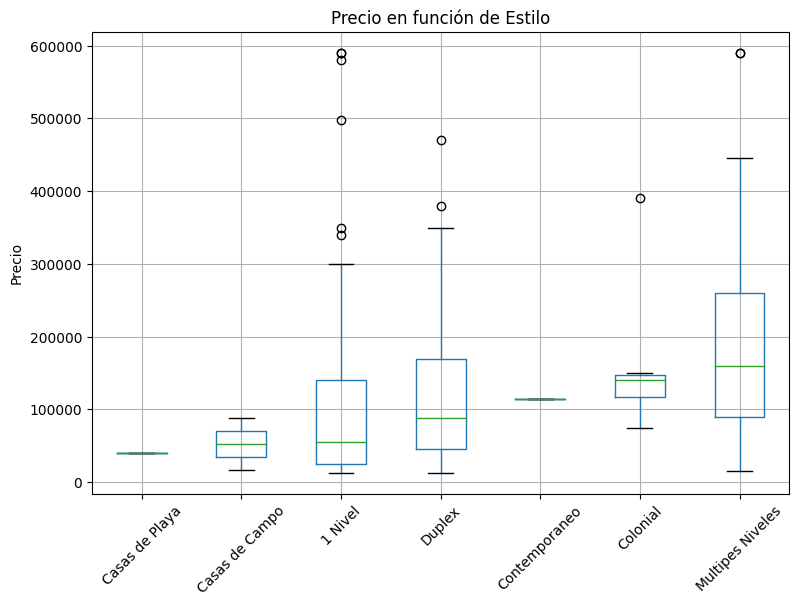

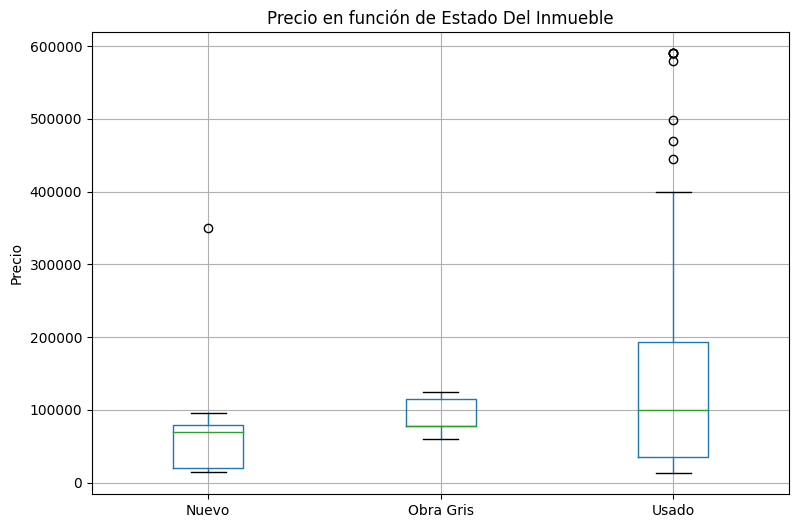

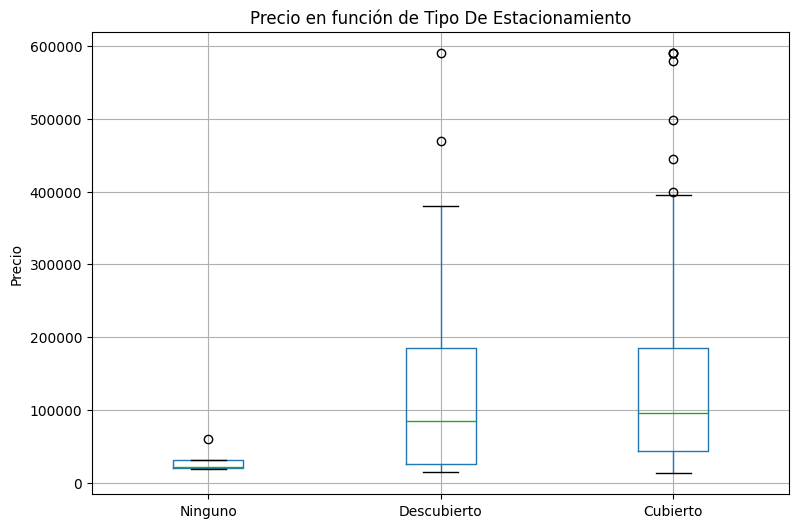

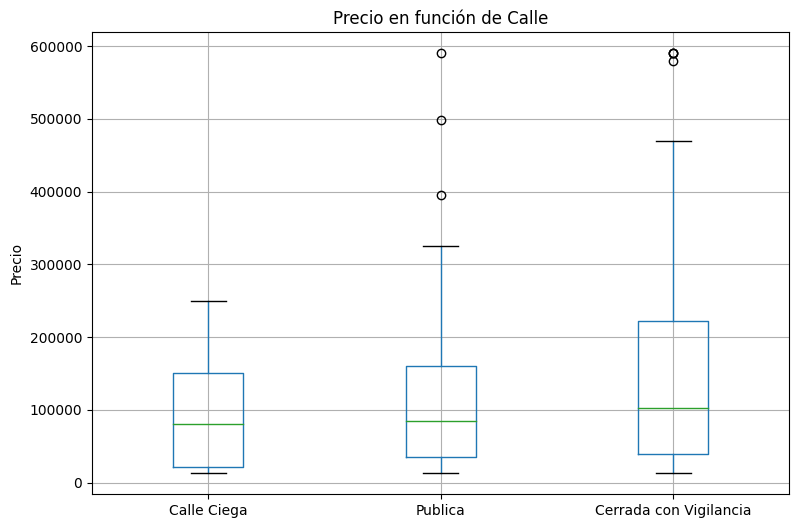

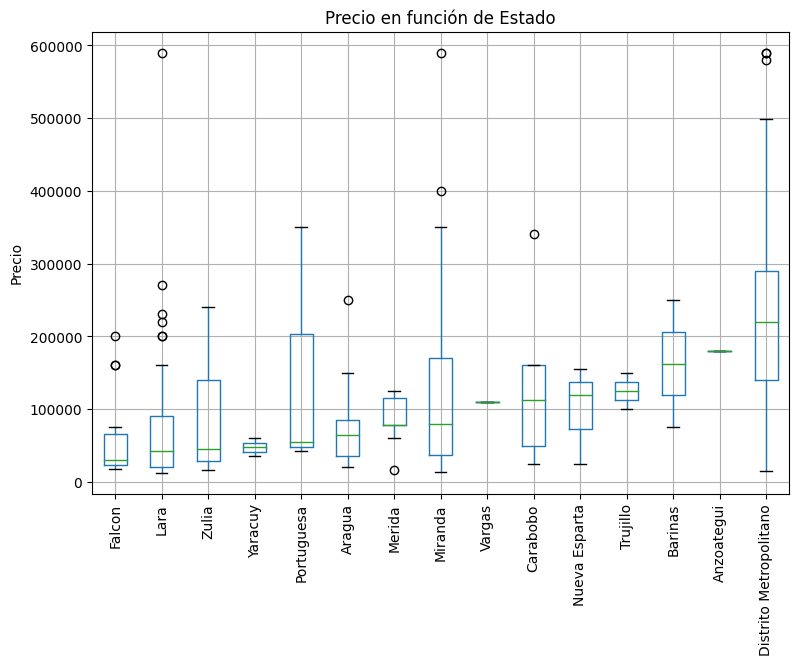

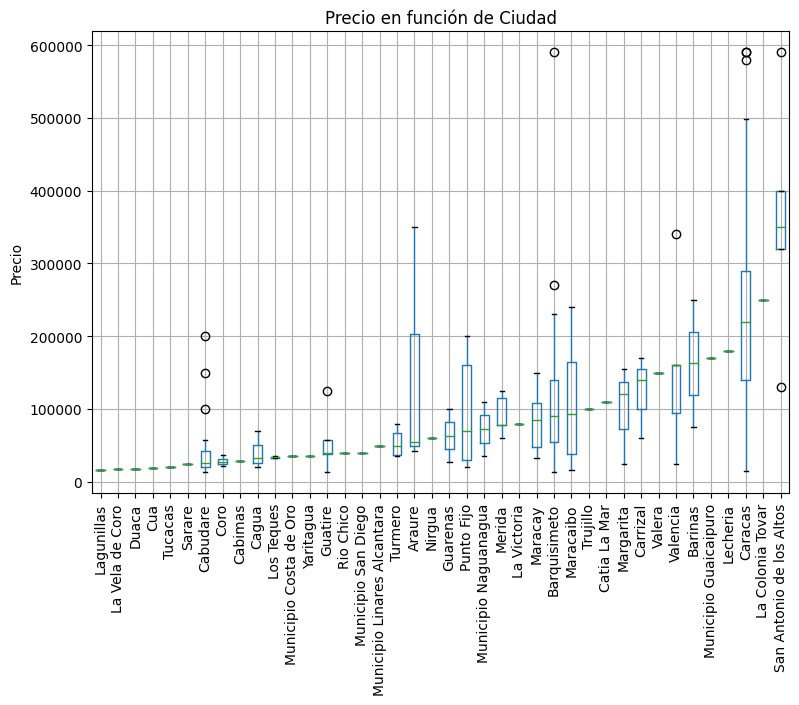

In [126]:
graph_categorical_relations(houses, houses_categorical_features)

Para las casas, el estado del inmueble y calle no parecen tener mucho efecto en el precio de la misma, por lo tanto no van a ser consideradas features para el entrenamiento de los modelos.  
Se va a considerar solo la ciudad ya que esta depende del estado, y el tipo de estacionamiento no es definitorio, sino si tiene o no estacionamiento, lo cual esta ya marcado por la columna "Puestos De Estacionamiento".

Por lo visto anteriormente, voy a quedarme con todas las columnas numericas, todas las ordinales y solo el estilo y ciudad para las categoricas.

In [127]:
houses_categorical_features = ['Estilo', 'Ciudad']

Se puede observar como el precio de la casa aumenta con el terreno y área de la misma. Pero el área de la casa, así como todas las variables ordinales, es generalmente linealmente dependiente con el terreno de la misma.

In [128]:
def graph_area_relation(df, features):
    for col in features:
        fig = plt.figure(figsize=(5,5))
        ax = plt.gca()
        plt.scatter(houses['Área Privada'], houses[col])
        ax.set_xlabel('Área Privada')
        ax.set_ylabel(col)
        ax.set_title(col + ' en función del área')
        trend = np.polyfit(houses.loc[houses[col].notnull(), 'Área Privada'], houses.loc[houses[col].notnull(), col], 1)
        p = np.poly1d(trend)
        plt.plot(houses['Área Privada'], p(houses['Área Privada']), color='red')
    plt.show()

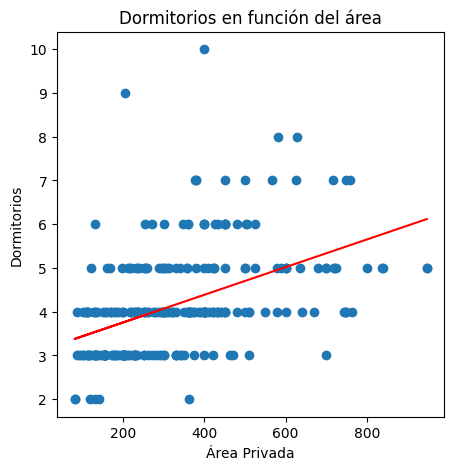

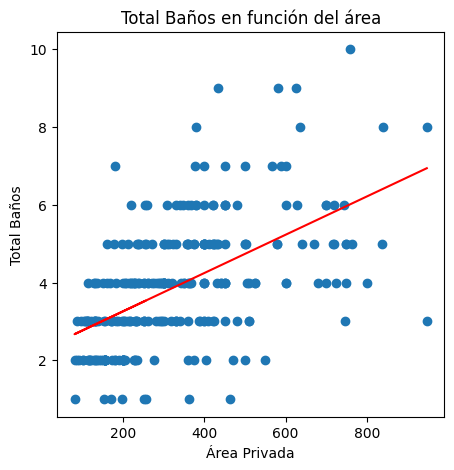

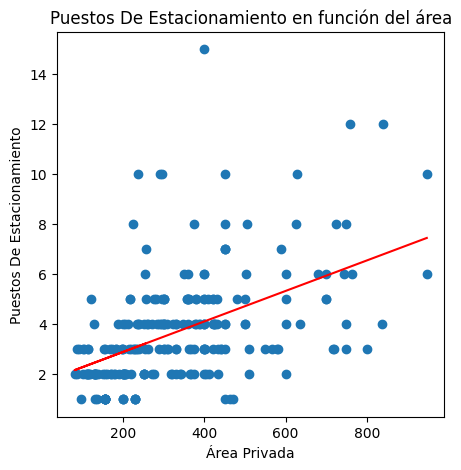

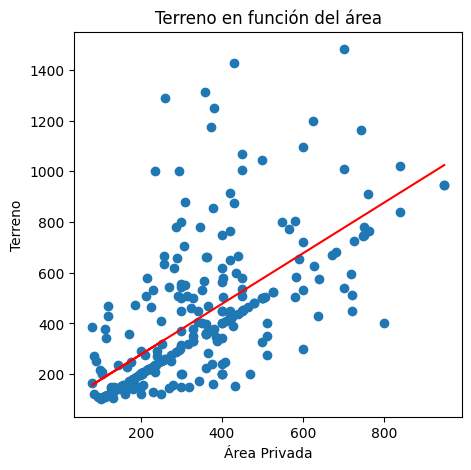

In [129]:
graph_area_relation(houses, houses_ordinal_features + ['Terreno'])

## Preprocesamiento

Se con anterioridad debido al analisis de los datos que en la columna de puestos de estacionamientos hay valores nulos, los cuales voy a limpiar.

In [130]:
houses['Puestos De Estacionamiento'].isnull().sum()

42

In [131]:
houses[(houses['Puestos De Estacionamiento'].isnull()) & (houses['Tipo De Estacionamiento'] != "Ninguno")].head()

,Precio,Codígo RAH,Tipo de Propiedad,Estilo,Área Privada,Terreno,Estado Del Inmueble,Dormitorios,Total Baños,Baños Completos,Tipo De Estacionamiento,Puestos De Estacionamiento,Amoblado,Dormitorio De Servicio,Calle,País,Estado,Ciudad,Urbanización,Medios Baños
10,230000,VE 23-26179,Casa,Duplex,340,450,Usado,5,6,6,Cubierto,NaN,Si,Si,Publica,Venezuela,Lara,Barquisimeto,Del Este,0.0
28,170000,VE 23-26106,Casa,Multipes Niveles,230,230,Usado,3,4,4,Cubierto,NaN,No,No,Publica,Venezuela,Miranda,Carrizal,Municipio Carrizal,0.0
30,180000,VE 23-26100,Casa,Multipes Niveles,300,542,Usado,4,4,3,Descubierto,NaN,Parcialmente,Si,Cerrada con Vigilancia,Venezuela,Distrito Metropolitano,Caracas,La Trinidad,1.0
70,22000,VE 23-25937,Casa,1 Nivel,220,220,Usado,4,4,4,Cubierto,NaN,No,No,Cerrada con Vigilancia,Venezuela,Lara,Cabudare,La Mata,0.0
73,160000,VE 23-25932,Casa,Multipes Niveles,525,525,Usado,6,4,4,Cubierto,NaN,Parcialmente,No,Cerrada con Vigilancia,Venezuela,Lara,Barquisimeto,Los Libertadores,0.0


In [132]:
# Puestos de estacionamiento nulos cuando el tipo es distinto de ninguno
houses[(houses['Puestos De Estacionamiento'].isnull()) & (houses['Tipo De Estacionamiento'] != "Ninguno")]['Puestos De Estacionamiento'].isnull().sum()

38

In [133]:
# Puestos de estacionamiento nulos cuando el tipo es ninguno (mal cargados)
houses[(houses['Puestos De Estacionamiento'].isnull()) & (houses['Tipo De Estacionamiento'] == "Ninguno")]['Puestos De Estacionamiento'].isnull().sum()

4

In [134]:
mask_no_parking_and_null = (houses['Puestos De Estacionamiento'].isnull()) & (houses['Tipo De Estacionamiento'] == "Ninguno")
# Si el tipo de estacionamiento es ninguno entonces tiene cero puestos de estacionamiento
houses.loc[mask_no_parking_and_null, 'Puestos De Estacionamiento'] = houses.loc[mask_no_parking_and_null, 'Puestos De Estacionamiento'].fillna(0)

In [135]:
mask_parking_but_null = (houses['Puestos De Estacionamiento'].isnull()) & (houses['Tipo De Estacionamiento'] != "Ninguno")
# Si el tipo de estacionamiento es ninguno entonces tiene al menos un puesto de estacionamiento
houses.loc[mask_parking_but_null, 'Puestos De Estacionamiento'] = houses.loc[mask_parking_but_null, 'Puestos De Estacionamiento'].fillna(1)

In [136]:
houses['Puestos De Estacionamiento'].isnull().sum()

0

In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [138]:
# Estandarizacion de columnas numericas
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encoding para columnas categoricas
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinando preprocesadores
preprocessor = ColumnTransformer(transformers=
                                 [('num', numeric_transformer, house_numeric_features),('cat', categorical_transformer, houses_categorical_features)])

## Entrenamiento

In [139]:
print(house_numeric_features, houses_ordinal_features, houses_categorical_features, sep='\n')

['Área Privada', 'Terreno']
['Dormitorios', 'Total Baños', 'Puestos De Estacionamiento']
['Estilo', 'Ciudad']


In [140]:
# Me quedo solo con las columnas que voy a usar
houses = houses[house_numeric_features + houses_ordinal_features + houses_categorical_features + ['Precio']]

In [141]:
# Separo en datasets de features y label
x_houses, y_houses = houses.drop(labels=['Precio'], axis=1), houses['Precio']
print('Features:',x_houses[:3], '\nLabel:',y_houses[:3].values, sep='\n')

Features:
   Área Privada  Terreno  Dormitorios  Total Baños  \
0           948      948            5            8   
1           307      704            5            6   
2           380     1251            5            6   

   Puestos De Estacionamiento            Estilo   Ciudad  
0                        10.0           1 Nivel  Caracas  
1                         4.0  Multipes Niveles  Caracas  
2                         5.0           1 Nivel  Caracas  

Label:
[498000 240000 580000]


In [142]:
from sklearn.model_selection import train_test_split

In [143]:
# Separo en dataframes de entrenamiento y verificacion
x_houses_train, x_houses_test, y_houses_train, y_houses_test = train_test_split(x_houses, y_houses, test_size=0.3, random_state=69)
print(f"Training set: {x_houses_train.shape[0]} filas\nTest set: {x_houses_test.shape[0]} filas")

Training set: 193 filas
Test set: 83 filas


In [144]:
preprocessor.fit(x_houses_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Área Privada', 'Terreno']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Estilo', 'Ciudad'])])

In [145]:
x_houses_train_ = preprocessor.transform(x_houses_train)
x_houses_test_ = preprocessor.transform(x_houses_test)

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
model = LinearRegression().fit(x_houses_train_, y_houses_train)

In [148]:
houses_predictions = model.predict(x_houses_test_)

In [149]:
print('Labels predichas: ', np.round(houses_predictions[:5]))
print('Labels reales: ', y_houses_test[:5].values)

Labels predichas:  [239691. 178946.  12501. 174849.  78435.]
Labels reales:  [ 55000 160000  14000 180000  77500]


In [150]:
from sklearn.metrics import mean_squared_error, r2_score

In [151]:
mse = mean_squared_error(y_houses_test, houses_predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_houses_test, houses_predictions)
print("R2:", r2)

MSE: 6285429483.792859
RMSE: 79280.70057582021
R2: 0.5014816164851336


El modelo no predice bien el precio, asi que voy a probar con otros modelos.

In [172]:
from sklearn.linear_model import Lasso

In [177]:
model = Lasso(max_iter=12000).fit(x_houses_train_, y_houses_train)

houses_predictions = model.predict(x_houses_test_)

mse = mean_squared_error(y_houses_test, houses_predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_houses_test, houses_predictions)
print("R2:", r2)

MSE: 6167574070.125923
RMSE: 78533.90395317123
R2: 0.5108291225642668


In [182]:
from sklearn.ensemble import RandomForestRegressor

In [183]:
model = RandomForestRegressor().fit(x_houses_train_, y_houses_train)

houses_predictions = model.predict(x_houses_test_)

mse = mean_squared_error(y_houses_test, houses_predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_houses_test, houses_predictions)
print("R2:", r2)

MSE: 6267779358.686747
RMSE: 79169.30818623304
R2: 0.5028815067964356


In [184]:
from sklearn.ensemble import GradientBoostingRegressor

In [185]:
model = GradientBoostingRegressor().fit(x_houses_train_, y_houses_train)

houses_predictions = model.predict(x_houses_test_)

mse = mean_squared_error(y_houses_test, houses_predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_houses_test, houses_predictions)
print("R2:", r2)

MSE: 6404704805.050256
RMSE: 80029.39962945027
R2: 0.49202149279751994


Se puede ver como los resultados para todos los modelos son similares, lo que indica que el problema no es del modelo utilizado, sino que los datos disponibles son malos. Entra basura -> sale basura.

Solo para comprobar esta afirmacion, quiero buscar parametros optimos para el ultimo modelo.

In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [195]:
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3], 'n_estimators' : [10, 25, 50, 75],
    'min_samples_split': [2, 3, 4], 'min_samples_leaf': [2, 3, 4], 'max_depth': [2, 3, 4]}

score = make_scorer(r2_score)
gridsearch = GridSearchCV(GradientBoostingRegressor(), params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(x_houses_train_, y_houses_train)
print("Mejor combinacion de parametros:", gridsearch.best_params_, "\n")

model=gridsearch.best_estimator_
print(model, "\n")

predictions = model.predict(x_houses_test_)
mse = mean_squared_error(y_houses_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_houses_test, predictions)
print("R2:", r2)

Mejor combinacion de parametros: {'learning_rate': 0.05, 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 75} 

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_leaf=3,
                          n_estimators=75) 

MSE: 5668122256.857263
RMSE: 75286.93284267372
R2: 0.5504423122812587


A pesar de haber buscado parametros optimos para el modelo de Gradient Boosting, no mejoro mucho su rendimiento. Por esto concluyo con que se necesitaria mas datos de casas para compensar la baja calidad de los datos, y asi obtener mejores predicciones.  
De todas formas, voy a exportar el modelo.

In [194]:
import joblib

In [197]:
joblib.dump(model, './casas-modelo-ml.pkl')

['./casas-modelo-ml.pkl']